# Data Challenge 1

## Download data

In [1]:
#! pip install -q lalsuite
#! pip install -q gwpy
#! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu

# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

--2022-05-26 02:31:58--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  2.62MB/s    in 1.5s    

2022-05-26 02:32:00 (2.62 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



## Sampling rate and duration

In [44]:
duration = len(gwpy_strain)*gwpy_strain.dt
sampling_rate = 1/gwpy_strain.dt
print("duration = {}".format(duration))
print("sampling rate = {}".format(sampling_rate))

duration = 128.0 s
sampling rate = 4096.0 1 / s


## Plotting the data

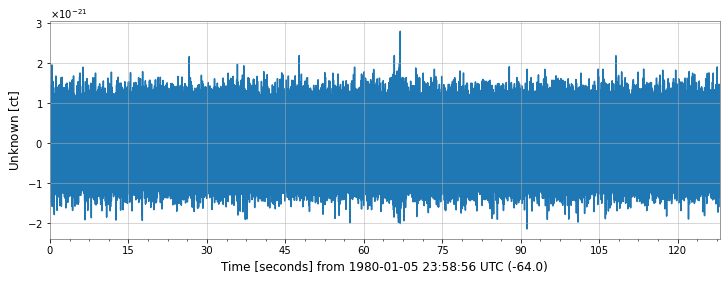

In [8]:
%matplotlib inline
plot = gwpy_strain.plot()

## Q-transform

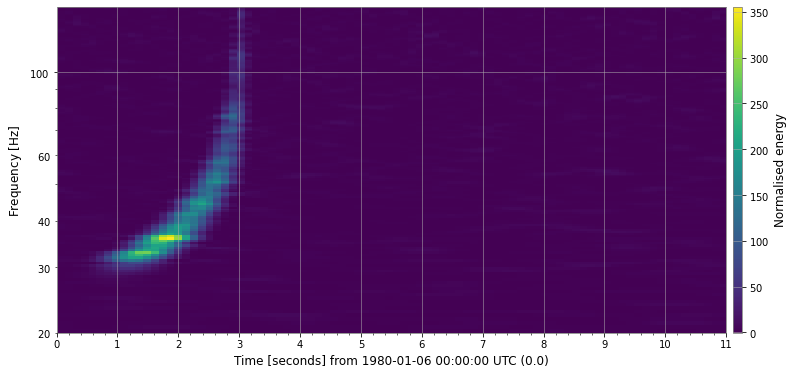

In [59]:
hq = gwpy_strain.q_transform(frange=(20, 150), qrange=(80, 150))
plot_hq = hq.plot()
ax = plot_hq.gca()
ax.set_yscale('log')
#ax.set_xlim(-64, 64)
ax.set_xlim(0, 75-64)
ax.colorbar(label="Normalised energy")
#print(hq)